## MCP host, client, server

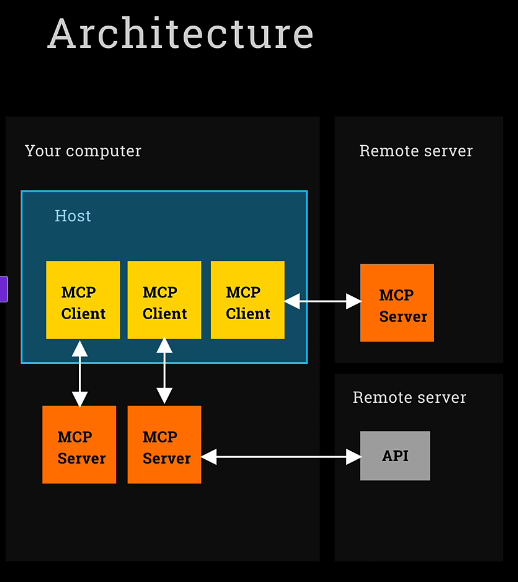

# 🧩 Core Concepts of MCP: Host, Server, Client

MCP (Model Context Protocol) is built around **three main components**:  

---

## 🖥️ 1. MCP Host
- The **overall application** that runs the agent and manages tools.  
- Think of it as the **container or environment** where everything lives.  
- Examples:
  - Claude Desktop (manages Claude and its tools).  
  - An agent framework you build using the OpenAI Agents SDK.  

**Role**:  
The host loads MCP clients, manages their lifecycle, and provides the **chat interface** or **agent runtime**.  

---

## 🔌 2. MCP Client
- A **small plugin** that lives *inside the host*.  
- Connects **1:1** with an MCP server.  
- Each tool/server requires its own MCP client inside the host.  

**Role**:  
Acts as a **bridge** between the host (agent) and the server (tools/context).  

---

## 🌐 3. MCP Server
- The **external piece of code** (lives outside the host).  
- Provides **tools, context, or prompt templates** to the agent.  
- Runs as a separate process (usually local, sometimes remote).  

**Examples**:
- **Fetch MCP Server** → runs a headless browser (via Playwright) to fetch web pages.  
- **File System Server** → reads/writes local files.  
- **Weather Server** → queries weather APIs online.  

**Role**:  
Provides the **capabilities** (tools + context) that the agent can use.

**NOTES**:  
- remote MCP servers: host/managed mcp servers
- most of the time, you dowbload a mcp server from a remore repo, and run on your machine locally
- for remote mcp server:
  - it is more common to have a server that you call an API to do a service like service for weather info or stock info
  - it is rare that you have a remote server that is hosted on a remote machine.

---

## 📊 How They Work Together
1. **Host** = Main application (Claude Desktop / OpenAI Agent SDK app).  
2. **Client** = Runs inside the host, connects to a specific server.  
3. **Server** = Runs outside the host, provides tools or data.  

---

## 📌 Example: Fetching a Webpage
- **Host**: Claude Desktop.  
- **Client**: Fetch MCP client (inside host).  
- **Server**: Fetch MCP server (runs a headless Chrome with Playwright).  
- Flow:
  1. User asks Claude → “Read this webpage.”  
  2. Host routes request to Fetch client.  
  3. Client calls Fetch server.  
  4. Server fetches page → returns content.  
  5. Claude uses that content to answer.  

---


# 🚉 MCP Transport Mechanisms

There are **two main transport mechanisms** in the MCP specification:  

---

## 🔹 1. Stdio (Standard Input/Output)

**How it works**  
- The MCP client spawns a **local process** for the server.  
- Communication happens via **standard input/output streams** (pipes).  

**✅ Pros**
- Simple & lightweight (no network stack needed).  
- Fast for local usage with minimal overhead.  
- Secure (runs locally, no external exposure).  
- Default choice for most MCP servers.  

**⚠️ Cons**
- Local only (cannot connect to remote servers).  
- Each server runs as its own process → resource overhead possible.  

**📌 When to use**
- **Default choice**: whenever MCP servers are installed and run locally (e.g., file system tools, web fetchers, weather checkers, etc.).  

---

## 🔹 2. SSE (Server-Sent Events over HTTPS)

**How it works**  
- The MCP client connects to the server via **HTTPS**.  
- Uses streaming responses (like how LLMs stream tokens).  

**✅ Pros**
- Works with **remote/hosted MCP servers**.  
- Supports **streaming** intermediate results for long tasks.  
- Scalable: multiple clients can connect to one hosted server.  

**⚠️ Cons**
- More complex setup (networking, authentication, infra needed).  
- Less common (few managed MCP servers available today).  
- Security overhead: authentication, rate limits, etc.  

**📌 When to use**
- When the **MCP server is remote/hosted** (rare case).  
- When **real-time streaming** over the web is required.  
- When multiple clients must connect to the same shared MCP server.  

---

## 🧭 Rule of Thumb

- **Use Stdio** → for local MCP servers (the **vast majority of cases**).  
- **Use SSE** → only if connecting to **remote/hosted MCP servers** or when **streaming** is required.  

---

## 📊 Quick Comparison Table

| Feature                  | Stdio (Default)           | SSE (Server-Sent Events)        |
|---------------------------|---------------------------|---------------------------------|
| **Connectivity**         | Local only                | Remote / Hosted                 |
| **Setup complexity**     | Very simple               | Requires HTTPS, networking, auth |
| **Performance**          | Fast, low overhead        | Higher latency (network)        |
| **Security**             | Isolated, local           | Needs auth, security controls   |
| **Streaming support**    | Limited                   | Full streaming supported        |
| **Common use case**      | File access, local tools  | Cloud-hosted shared tools       |

